<a href="https://www.kaggle.com/code/yashwanthreddy27/stroke-prediction-eda-prediction?scriptVersionId=96634475" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Created by Yashwanth Reddy**

**🧠 Stroke Prediction 👨‍⚕‍ -📊EDA + Prediction📈**

**26th May 2022**


# <center> 🧠 Stroke Prediction 👨‍⚕‍ -📊EDA + Prediction📈 </center>
#### <center>I'm just beginner trying to get better. If you find this notebook helpful in any way, support with an upvote👍, also leave a feedback this will help me understand what else I could have done to make this notebook better and implement it in my next projects</center>

# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Loading and Preperation](#3)
    - [3.1 Exploring Train Data](#3.1)
- [4. EDA](#4)
    - [4.1  Feature Distribution of Categorical Features ](#4.1)
    - [4.2 Feature Distribution of Target Variable](#4.2)
    - [4.3 Feature Distribution of Continuous Features ](#4.3)
    - [4.4 Pairplot according to target variable ](#4.4)
    - [4.5 Correlation Matrix ](#4.5)
    - [4.6 Insights from the EDA: ](#4.6)    
- [5. Data Pre-Processing](#5)    
    - [5.1 Basic statistics of training data ](#5.1)
    - [5.2 Understanding the Continuos and Categorical Data](#5.2)
- [6. Modeling](#6)
    - [6.1 Splitting the train set](#6.1)
    - [6.2 Logistic Regression ](#6.2)
    - [6.3 Random Forest](#6.3)
    - [6.4 Decision Tree ](#6.4)
    - [6.5 Adaboost Classifier ](#6.5)

<a id="1"></a>
# **<center><span style="color:#876dbf;">Introduction  </span></center>**

![](https://healthjournal.uconn.edu/wp-content/uploads/sites/1391/2017/10/featured_brain.jpg)

**According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.**
**This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient**
**There are a total of 11 clinical features for predicting stroke events**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#876dbf;">Imports  </span></center>**

Importing all the necessary libraries  

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
os.listdir("../input/")

['stroke-prediction-dataset']

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#876dbf;">Data Loading and Preparation </span></center>**

In [2]:
train = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

## <span style="color:#c9af44;"> Column Descriptions  : </span>


- `id`: unique identifier
- `gender`: "Male", "Female" or "Other"
- `age`: age of the patient
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- `ever_married`: "No" or "Yes"
- `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- `Residence_type`: "Rural" or "Urban"
- `avg_glucose_level`: average glucose level in blood
- `bmi`: body mass index
- `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- `stroke`: 1 if the patient had a stroke or 0 if not

`Note: "Unknown" in smoking_status means that the information is unavailable for this patient`


<a id="3.1"></a>
## <span style="color:#e76f51;"> Exploring Train Data : </span>

### <span style="color:#c9af44;"> Quick view of the Train Data : </span>

Below are the first 5 rows of train dataset:

In [3]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Below are the shape of the train dataset:

In [4]:
train.shape

(5110, 12)

Checking the NULL values

In [5]:
train.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Identifying the unique count in each feature

In [6]:
dict = {}
for i in list(train.columns):
    dict[i] = train[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Train Data:</u></b><br>
 
* <i> There are total of <b><u>12</u></b> columns and <b><u>5110</u></b> rows in <b><u>train</u></b> data.</i><br>
* <i> All 11 feature columns have missing values in them with <b><u>BMI</u></b> having highest missing values <u>(201)</u>  </i><br>
* <i> <b><u>stroke</u></b> is the target variable which is only available in the <b><u>train</u></b> dataset.</i><br>
* <i><b><u>gender</u></b> , <b><u>hypertension</u></b> , <b><u>heart_disease</u></b> , <b><u>ever_married</u></b> , <b><u>work_type</u></b> , <b><u>Residence_type</u></b> , <b><u>smoking_status</u></b>  will be out categorical data</i><br>
</div>


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#876dbf;"> EDA </span></center>**

<a id="4.1"></a>
## <span style="color:#e76f51;">  Feature Distribution of Categorical Features </span>

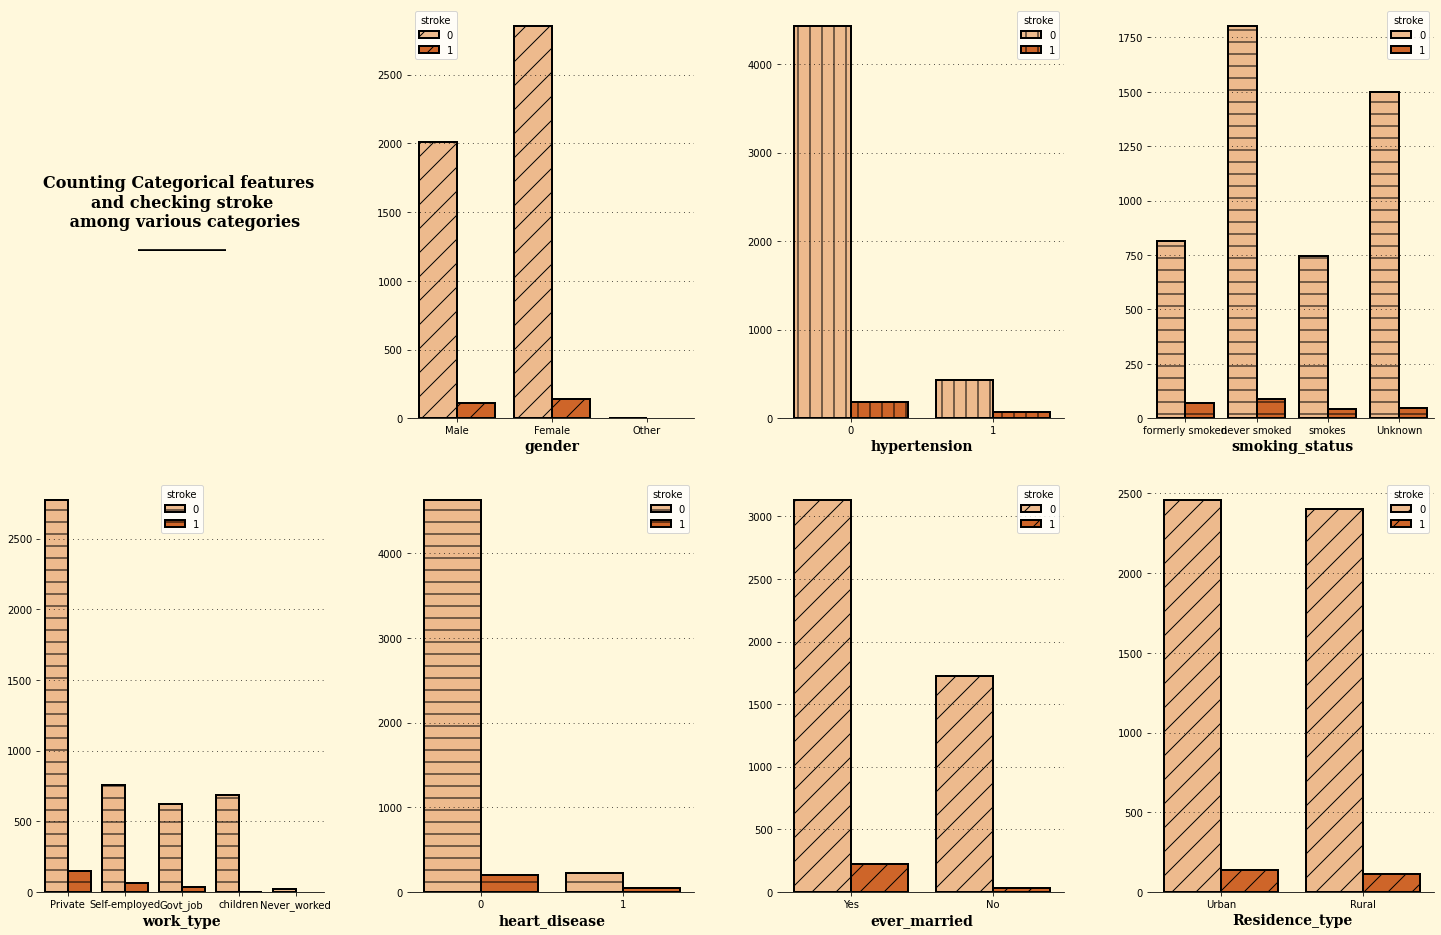

In [7]:
fig = plt.figure(figsize=(25,25))
gs = fig.add_gridspec(3,4)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[-2,0])
ax6 = fig.add_subplot(gs[1,3])
ax7 = fig.add_subplot(gs[0,3])

background_color = "#FFF8DC"

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Counting Categorical features \nand checking stroke\n among various categories\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# performance of each field Count
'','', '', '', '', 'Residence_type', 'smoking_status'

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=train, x='gender',palette = 'Oranges', hue='stroke',edgecolor='black',**{'hatch':'/','linewidth':2})
ax1.set_xlabel("gender",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2, data=train, x='hypertension',palette = 'Oranges', hue='stroke',edgecolor='black',**{'hatch':'|','linewidth':2})
ax2.set_xlabel("hypertension",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3, data=train, x='heart_disease',palette = 'Oranges',hue='stroke',edgecolor='black',**{'hatch':'-','linewidth':2})
ax3.set_xlabel("heart_disease",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4, data=train, x='ever_married',palette = 'Oranges',hue='stroke',edgecolor='black',**{'hatch':'/','linewidth':2})
ax4.set_xlabel("ever_married",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5, data=train, x='work_type',palette = 'Oranges',hue='stroke',edgecolor='black',**{'hatch':'-','linewidth':2})
ax5.set_xlabel("work_type",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6, data=train, x='Residence_type',palette = 'Oranges',hue='stroke',edgecolor='black',**{'hatch':'/','linewidth':2})
ax6.set_xlabel("Residence_type",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7, data=train, x='smoking_status',palette = 'Oranges',hue='stroke',edgecolor='black',**{'hatch':'-','linewidth':2})
ax7.set_xlabel("smoking_status",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)

ax4.spines["top"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["right"].set_visible(False)

ax5.spines["top"].set_visible(False)
ax5.spines["left"].set_visible(False)
ax5.spines["right"].set_visible(False)

ax6.spines["top"].set_visible(False)
ax6.spines["left"].set_visible(False)
ax6.spines["right"].set_visible(False)

ax7.spines["top"].set_visible(False)
ax7.spines["left"].set_visible(False)
ax7.spines["right"].set_visible(False)

<a id="4.2"></a>
## <span style="color:#e76f51;">  Feature Distribution of Target Variable </span>

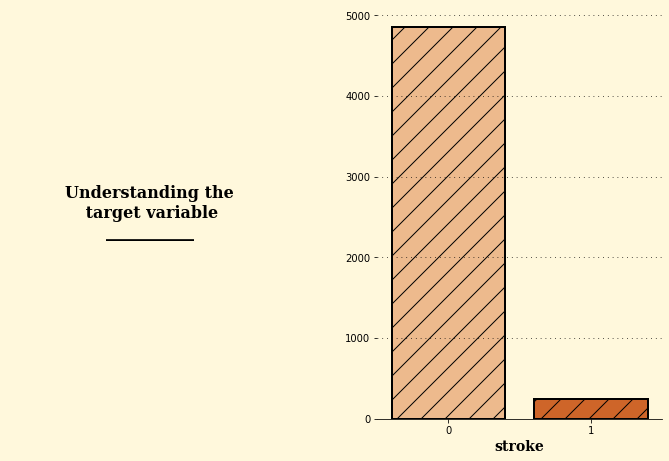

In [8]:
fig = plt.figure(figsize=(25,25))
gs = fig.add_gridspec(3,4)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#FFF8DC"

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Understanding the\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=train, x='stroke',palette = 'Oranges', edgecolor='black',**{'hatch':'/','linewidth':2})
ax1.set_xlabel("stroke",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

<a id="4.3"></a>
## <span style="color:#e76f51;">  Feature Distribution of Continuous Features </span>

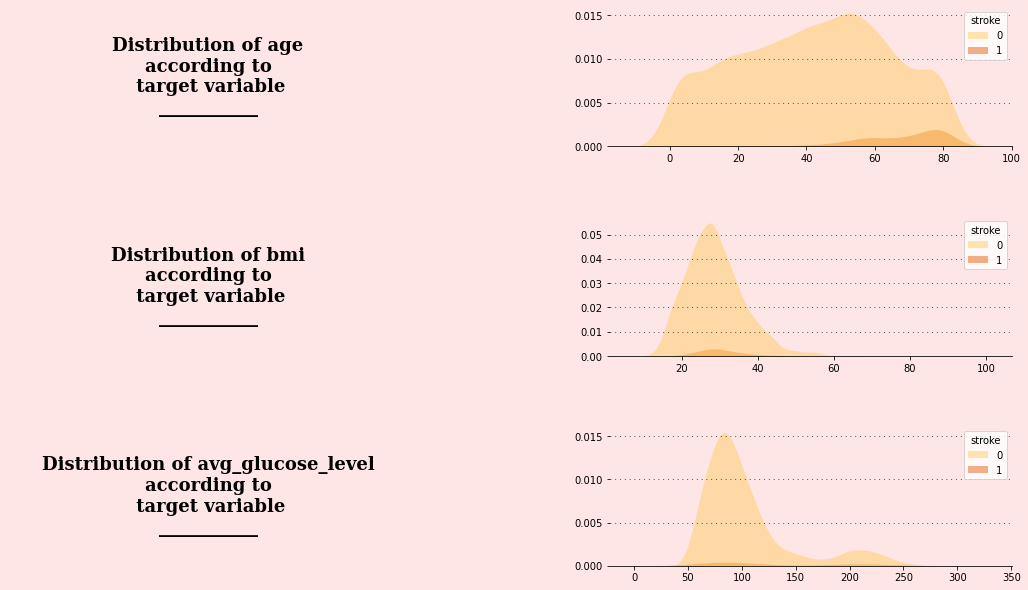

In [9]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=train, x='age',hue="stroke", fill=True,palette="YlOrBr", alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# bmi title
ax2.text(0.5,0.5,"Distribution of bmi\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# bmi
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=train, x='bmi',hue="stroke", fill=True,palette="YlOrBr", alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# avg_glucose_level title
ax4.text(0.5,0.5,"Distribution of avg_glucose_level\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# avg_glucose_level
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=train, x='avg_glucose_level',hue="stroke", fill=True,palette="YlOrBr", alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")



for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)


<a id="4.4"></a>
## <span style="color:#e76f51;">  Pairplot according to target variable </span>

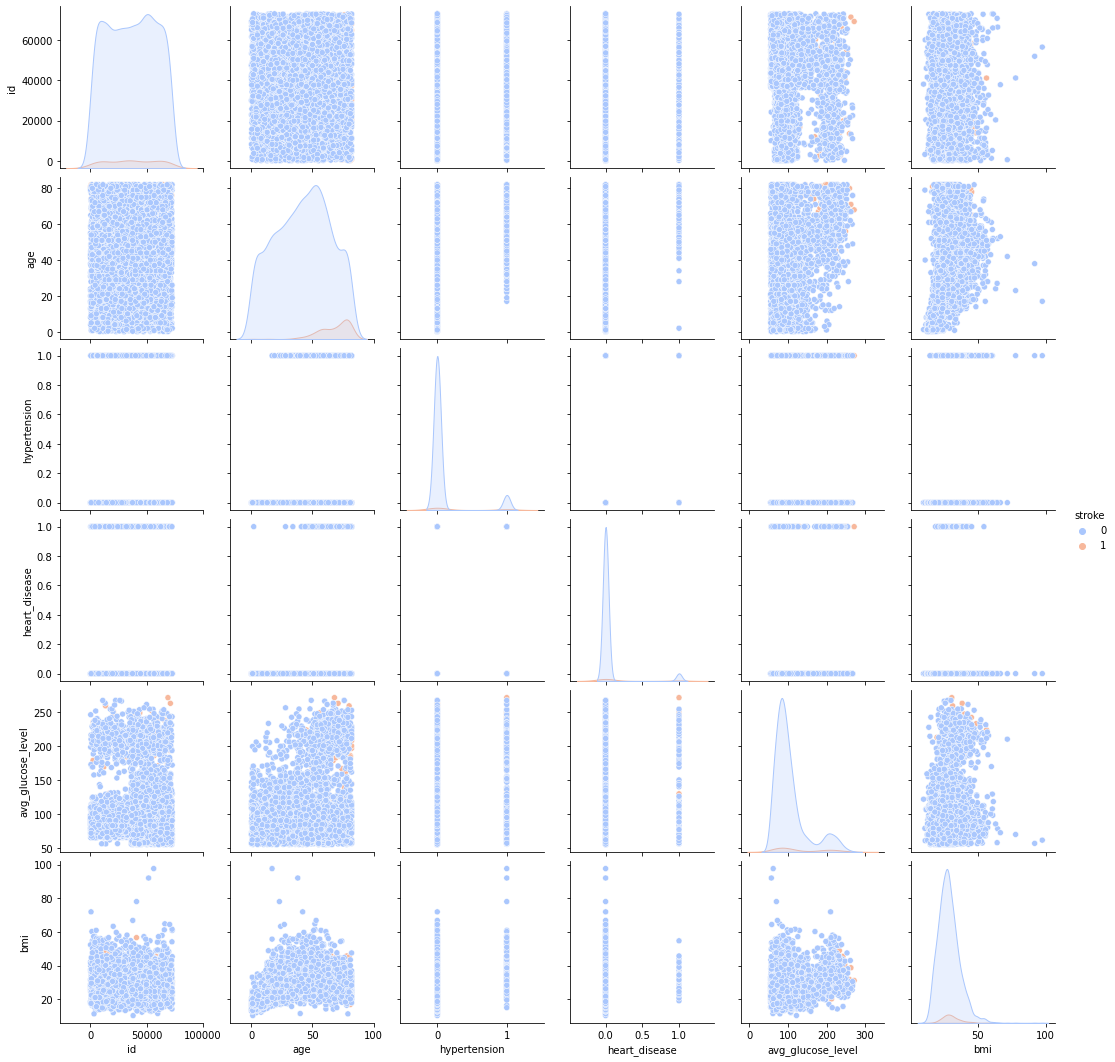

In [10]:
sns.pairplot(train,hue='stroke',palette = "coolwarm")
plt.show()


<a id="4.5"></a>
## <span style="color:#e76f51;">Correlation Matrix</span>

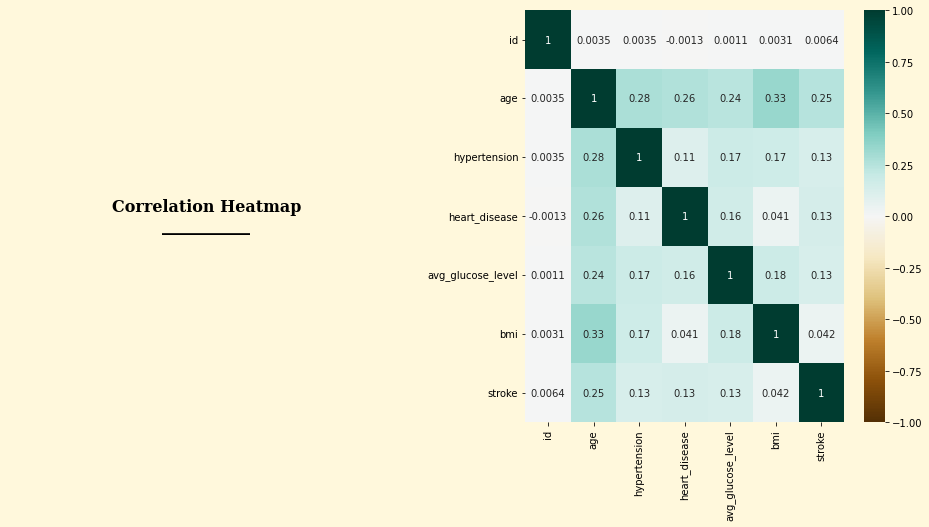

In [11]:

fig = plt.figure(figsize=(35,25))
gs = fig.add_gridspec(3,4)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#FFF8DC"

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Correlation Heatmap\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)


<a id="4.6"></a>
## <span style="color:#e76f51;"> Insights from the EDA: </span>


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Insights from the EDA:</u></b><br>
 
* <i>Female and male both have equal number of stroke cases while there is not any single case of stroke in other gender type.</i><br>
* <i> Patient with private job have more number stroke cases then self employed and govt. job</i><br>
* <i>There are few cases of strokes in children and those who are unemployed having no case</i><br>
* <i>Both Urban and rural have equal number of stroke cases.so this is not a useful feature.</i><br>
* <i>Stroke has the highest correlation with age </i><br>
* <i>Age has the highest correlation with hypertension</i><br>
* <i>As peopke start to age the risk of having a stroke is increasing most of stroke cases belong to 60-80 age group that means most of patients are in their older age.</i><br>
* <i>Patients with stroke having heigher avg_glucose_level then 120.</i><br>
* <i> normaly person who smoke are more likely have a chance of stroke but in our dataset smoking doesn't have much impact on stroke.</i><br>

<a id="5"></a>
# **<center><span style="color:#876dbf;"> Data Pre-Processing </span></center>**

<a id="5.1"></a>
## <span style="color:#e76f51;"> Basic statistics of training data : </span>

Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [12]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<a id="5.2"></a>
## <span style="color:#e76f51;">Understanding the Continuos and Categorical Data :  </span>

In [13]:
cat_cols = ['gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
con_cols = ["Age","avg_glucose_level","bmi"]
target_col = ["stroke"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
The continuous cols are :  ['Age', 'avg_glucose_level', 'bmi']
The target variable is :   ['stroke']


Imputing Missing Values

In [14]:
train['bmi'] = train['bmi'].fillna(train['bmi'].median())

Assigning range and converting BMI to categorical type

| BMI | Weight Status |
| :-: | :-: |
| Below 18.5 |Underweight |
| 18.5—24.9	  |Healthy |
| 25.0—29.9	  |Overweight |
| 30.0 and Above |Obese |

In [15]:
train['bmi'] = pd.cut(x=train['bmi'], bins=[0,18.4,24.9,29.9,100],
                     labels=['Underweight','Healthy','Overweight', 'Obese'])

Encoding Categorical Features

In [16]:
label_encoder = preprocessing.LabelEncoder()

label_cols = ["gender", "hypertension","heart_disease", "ever_married" ,"Residence_type","stroke","bmi"]
for col in label_cols:
    train[col]= label_encoder.fit_transform(train[col])



<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<center><span style="color:#876dbf;">Modeling </span></center>**

In [17]:
df= pd.get_dummies(train)

x=df.drop('stroke', axis=1)
y=df['stroke']

<a id="6.1"></a>
## <span style="color:#e76f51;">Splitting the train set </span>


In [18]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


### <span style="color:#c9af44;">Feature Scaling :  </span>

In [19]:

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Since there are less samples for stroke=1, oversampling has to be performed for balancing the dataset**

In [20]:

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

<a id="6.2"></a>
## <span style="color:#e76f51;"> Logistic Regression </span>


In [21]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)
score_lr=accuracy_score(y_test,y_lr_pred)*100
print("accuracy score: ",accuracy_score(y_train,lr.predict(x_train))*100)
print("accuracy score: ",score_lr)

print(f"Confusion Matrix :- \n {confusion_matrix(y_test,y_lr_pred)}")
print(f"Classiication Report : -\n {classification_report(y_test, y_lr_pred)}")

accuracy score:  95.22994129158513
accuracy score:  94.81409001956948
Confusion Matrix :- 
 [[968   0]
 [ 53   1]]
Classiication Report : -
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022



<a id="6.3"></a>
## <span style="color:#e76f51;"> Random Forest </span>


In [22]:


rd_clf = RandomForestClassifier()
rd_clf.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, rd_clf.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(x_test))}")


Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9461839530332681 

Confusion Matrix :- 
[[967   1]
 [ 54   0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



<a id="6.4"></a>
## <span style="color:#e76f51;"> Decision Tree </span>


In [23]:

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(x_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.910958904109589 

Confusion Matrix :- 
[[925  43]
 [ 48   6]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       968
           1       0.12      0.11      0.12        54

    accuracy                           0.91      1022
   macro avg       0.54      0.53      0.53      1022
weighted avg       0.91      0.91      0.91      1022




<a id="6.5"></a>
## <span style="color:#e76f51;"> Adaboost Classifier </span>


In [24]:

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(x_train, y_train)

ada_acc = accuracy_score(y_test, ada.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, ada.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(x_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.910958904109589 

Confusion Matrix :- 
[[928  40]
 [ 51   3]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       968
           1       0.07      0.06      0.06        54

    accuracy                           0.91      1022
   macro avg       0.51      0.51      0.51      1022
weighted avg       0.90      0.91      0.91      1022




<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>